In [1]:
import numpy as np
from numpy import exp,log,sign,random
from matplotlib import pyplot as plt

In [2]:
# LogisticRegression
learning_rate=0.9
k=0.005
batch_size=32
epoch_num=50
def sigmoid(x):
    return 1/(1+exp(-x))
def forward(x):
    return sigmoid(w@x.T)
def compute_loss(p,y):
    return np.mean(-(y*log(p)+(1-y)*log(1-p)),axis=0)+k*np.linalg.norm(w,ord=1)
def backward(p,x,y):
    global w
    w-=learning_rate*np.mean((p-y).reshape(-1,1)*x,axis=0)+k*sign(w)
def logistic_fit(X,Y):
    global w
    XX=X.copy()
    YY=Y.copy()
    w=random.randn(XX[0].shape[0])*0.01
    I=list(range(len(XX)))
    LOSS=[]
    for epoch in range(epoch_num):
        random.shuffle(I)
        XX=XX[I]
        YY=YY[I]
        for i in range(0,len(XX),batch_size):
            x=XX[i:i+batch_size]
            y=YY[i:i+batch_size]
            p=forward(x)
            loss=compute_loss(p,y)
            LOSS.append(loss)
            backward(p,x,y)
    return LOSS
def logistic_predict(X):
    return np.where(forward(X)>0.5,1,0)
    
# StandardScaler
def scaler_fit(X):
    global mean,scale
    mean=X.mean(axis=0)
    scale=X.std(axis=0)
    scale[scale<np.finfo(scale.dtype).eps]=1.0
def scaler_transform(X):
    return (X-mean)/scale

# PolynomialFeatures
degree=3
def poly_transform(X):
    XX=X.T
    ret=[np.repeat(1.0,XX.shape[1]),XX[0],XX[1]]
    for i in range(2,degree+1):
        for j in range(0,i+1):
            ret.append(XX[0]**(i-j)*XX[1]**j)
    return np.array(ret).T

In [3]:
def train(X,Y):
    XX=poly_transform(X)
    scaler_fit(XX)
    XX=scaler_transform(XX)
    LOSS=logistic_fit(XX,Y)
    plt.plot(list(range(len(LOSS))),LOSS,color='r')
    plt.show()
def predict(X):
    XX=scaler_transform(poly_transform(X))
    return logistic_predict(XX)
def plot_decision_boundary(X,Y):
    x0_min,x0_max=X[:,0].min()-1,X[:,0].max()+1
    x1_min,x1_max=X[:,1].min()-1,X[:,1].max()+1
    m=500
    x0,x1=np.meshgrid(
        np.linspace(x0_min,x0_max,m),
        np.linspace(x1_min,x1_max,m)
    )
    XX=np.c_[x0.ravel(),x1.ravel()]
    Y_pred=predict(XX)
    Z=Y_pred.reshape(x0.shape)
    plt.contourf(x0,x1,Z,cmap=plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Spectral)
    plt.show()

In [4]:
def generate_data(F,l,r,n,y):
    x=np.linspace(l,r,n)
    X=np.column_stack((x,F(x)))
    Y=np.repeat(y,n)
    return X,Y

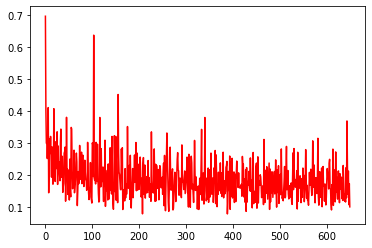

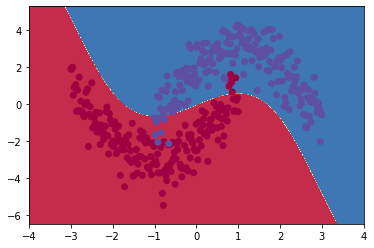

In [5]:
random.seed(114514)
data_size=200
X1,Y1=generate_data(lambda x:x**2+2*x-2+random.randn(data_size)*0.8,-3,1,data_size,0)
X2,Y2=generate_data(lambda x:-x**2+2*x+2+random.randn(data_size)*0.8,-1,3,data_size,1)
X=np.vstack((X1,X2))
Y=np.hstack((Y1,Y2))
train(X,Y)
plot_decision_boundary(X,Y)

In [6]:
w

array([-3.39698993e-03, -2.16239422e+00,  3.31111319e+00, -2.25714211e-02,
       -2.25217124e-02, -8.35613389e-03,  4.30698901e+00,  1.91216947e-02,
        1.34545212e-02,  4.03988919e-01])

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler()),
        ('logistic', LogisticRegression())
    ])
def plot_decision_boundary(X,Y):
    x0_min,x0_max=X[:,0].min()-1,X[:,0].max()+1
    x1_min,x1_max=X[:,1].min()-1,X[:,1].max()+1
    m=500
    x0,x1=np.meshgrid(
        np.linspace(x0_min,x0_max,m),
        np.linspace(x1_min,x1_max,m)
    )
    XX=np.c_[x0.ravel(),x1.ravel()]
    Y_pred=logistic.predict(XX)
    Z=Y_pred.reshape(x0.shape)
    plt.contourf(x0,x1,Z,cmap=plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Spectral)
    plt.show()

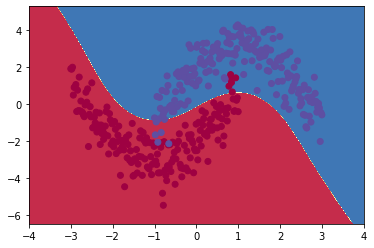

In [8]:
logistic=PolynomialLogisticRegression(degree=3)
logistic.fit(X,Y)
plot_decision_boundary(X,Y)

In [9]:
logistic.steps[-1][1].coef_

array([[ 0.        , -2.27809308,  2.66401211, -0.0241935 ,  0.04917858,
        -0.01796291,  4.11668534,  0.4473699 ,  0.54050304,  1.20105407]])

In [10]:
logistic.steps[-1][1].intercept_

array([0.16081081])